In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

import scipy.optimize as so

In [20]:
df = pd.read_csv('test_sample.csv')
df

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X482,X483,X484,X485,X486,X487,X488,X489,X490,X491
0,121.749682,1.566664,0.049526,-1.406493,-0.600269,-2.518321,2.730837,0.177036,3.051661,0.349147,...,-2.699442,-0.951728,3.021419,-1.883156,-2.600379,2.035336,0.190749,-3.027422,-1.084952,-1.337621
1,-14.283243,3.115010,3.352034,-2.204095,-1.341090,0.428333,-2.354347,0.096990,1.936099,5.459743,...,2.738414,0.954209,-1.609463,0.235286,-3.014299,0.068610,0.182336,-2.383352,-2.102038,0.805727
2,95.917913,-0.819930,-0.631293,-0.556120,-2.424944,3.828689,1.587667,0.170257,0.264026,3.054739,...,-0.780021,-0.524922,-2.269464,-0.436171,0.797404,0.176121,2.773005,-0.610636,0.079543,-2.885366
3,-91.009574,-4.604755,-1.012858,-4.019424,2.715535,0.159515,3.929755,-1.159971,0.239111,-0.619180,...,3.580341,-2.381250,-0.363154,0.180092,-0.586444,-0.017137,1.132777,-2.544918,-0.230971,-2.185010
4,65.215717,2.121894,0.051807,-2.563561,-0.803520,-4.193698,0.770869,-0.605897,-0.006774,-0.545788,...,-0.216800,-0.401473,-0.792617,-0.094893,0.754840,2.906880,0.080200,1.588261,-1.597047,-1.472934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-61.382273,-3.907603,-2.046747,4.199142,-0.839503,1.436382,-0.069310,-2.702436,3.754520,-2.116165,...,-1.164718,2.219166,4.295674,-0.429433,-0.189724,-3.999769,-1.237889,-0.246151,-0.319790,1.234109
496,-116.908262,0.924713,2.772505,0.798964,1.362238,-3.084472,2.453109,1.505341,-3.788540,1.614334,...,-2.107703,-1.544002,1.737124,-0.537288,-1.357115,2.208995,-0.945913,0.181243,1.265342,-0.702125
497,-73.589861,-0.108299,2.447530,1.362442,-0.499137,-1.689638,0.954431,-3.099342,-1.574570,-0.123052,...,0.020687,-0.808161,3.136440,0.578449,-1.898376,-0.075155,1.051346,0.683597,0.666296,-1.264639
498,-9.468866,-2.165551,-2.827932,1.176571,1.992474,-1.993882,2.991774,1.787406,3.867936,1.678903,...,0.082616,-0.182664,-3.692901,-1.152117,1.798630,-0.751029,2.150658,-0.882388,-0.619267,-0.624450


In [21]:
EPS = 1e-9
def nested_model(X, p):
  return np.dot(X, p[:-1]) + p[-1] + EPS

In [22]:
def R2(Y, Y_pred):
  return 1 - np.sum((Y - Y_pred)**2) / np.sum( (Y - np.mean(Y))**2 )

In [23]:
def score(Y, Y_pred):
  return np.sum((Y-Y_pred)**2)

In [24]:
cols = df.columns
cols

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X482', 'X483', 'X484', 'X485', 'X486', 'X487', 'X488', 'X489', 'X490',
       'X491'],
      dtype='object', length=492)

In [25]:
df.drop(columns = ['Y'])[cols[1:5]]

,X1,X2,X3,X4
0,1.566664,0.049526,-1.406493,-0.600269
1,3.115010,3.352034,-2.204095,-1.341090
2,-0.819930,-0.631293,-0.556120,-2.424944
3,-4.604755,-1.012858,-4.019424,2.715535
4,2.121894,0.051807,-2.563561,-0.803520
...,...,...,...,...
495,-3.907603,-2.046747,4.199142,-0.839503
496,0.924713,2.772505,0.798964,1.362238
497,-0.108299,2.447530,1.362442,-0.499137
498,-2.165551,-2.827932,1.176571,1.992474


In [26]:
cols[1:492], np.arange(2, 4)

(Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
        ...
        'X482', 'X483', 'X484', 'X485', 'X486', 'X487', 'X488', 'X489', 'X490',
        'X491'],
       dtype='object', length=491),
 array([2, 3]))

In [27]:
def solve(X, Y):

  return np.linalg.inv(X.T @ X) @ X.T @ Y

In [28]:
cols[1:2+1]

Index(['X1', 'X2'], dtype='object')

In [29]:
parameters_list = []
R2_list = []

for j in range(2, 492):
  X_train = df.drop(columns = ['Y'])[cols[1:j+1]].values
  Y_train = df['Y'].values

  # def minf(p):
  #   Y_pred = nested_model(X_train, p)
  #   return score(Y_train, Y_pred)

  # popt, pcov = so.curve_fit(nested_model, X_train, Y_train, p0 = [[np.ones(j+1)]])
  # popt = so.minimize(minf, np.ones(j+1)).x


  popt = solve(np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1), Y_train)

  R2_list.append(R2(Y_train, nested_model(X_train, popt)))


In [30]:
np.arange(2, 492)[np.array(R2_list) > 0.9][:3]

array([335, 336, 337])

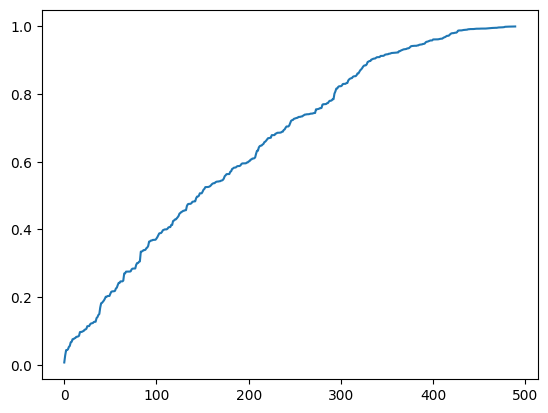

In [31]:
plt.plot(R2_list)

In [32]:
from sklearn.decomposition import PCA

In [42]:
X = df.drop(columns = ['Y'])
Y = df['Y']

In [34]:
R2_list_pca = []
for j in range(2, 336):
  pca = PCA(n_components=j)
  X_red = pca.fit_transform(X, Y)

  popt = solve(np.append(X_red, np.ones((X_red.shape[0], 1)), axis=1), Y)

  R2_list_pca.append(R2(Y, nested_model(X_red, popt)))

[249 250 251] [0.90246126 0.90249539 0.90292321]


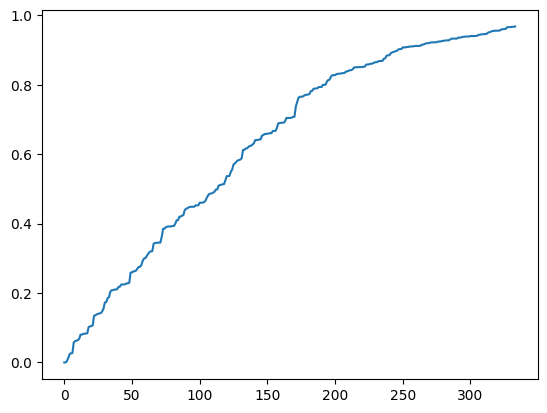

In [35]:
plt.plot(R2_list_pca)
print(np.arange(2, 336)[np.array(R2_list_pca) > 0.9][:3], np.array(R2_list_pca)[np.array(R2_list_pca) > 0.9][:3])

In [36]:
335 - 249

86

In [37]:
0.90246126

0.90246126

Text(0, 0.5, 'P-Value')

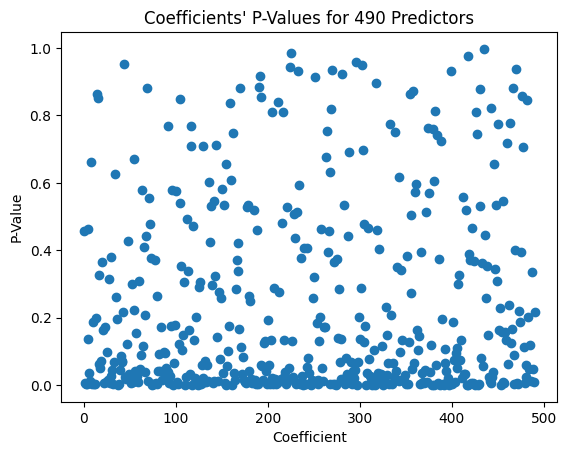

In [44]:
import statsmodels.api as sm
m490 = sm.OLS(Y, sm.add_constant(X.iloc[:,:490])).fit()
plt.plot(np.arange(491), m490.pvalues, 'o')
plt.title("Coefficients' P-Values for 490 Predictors")
plt.xlabel("Coefficient")
plt.ylabel("P-Value")

In [48]:
m2 = sm.OLS(Y, sm.add_constant(X.iloc[:,:20])).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2.575
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           0.000235
Time:                        18:07:03   Log-Likelihood:                -2834.7
No. Observations:                 500   AIC:                             5711.
Df Residuals:                     479   BIC:                             5800.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2482      3.270      1.299      0.1

In [50]:
def rel_imp_me(X, y):
  names = X.columns
  ser = pd.Series(index = names)
  lm0 = sm.OLS(y, sm.add_constant(X)).fit()
  for c in names:
    lm = sm.OLS(y, sm.add_constant(X[names.drop(c)])).fit()
    ser[c] = lm0.rsquared - lm.rsquared
  res = pd.DataFrame(columns =['last', 'first', 'betasq', 'pratt'], index=names)
  res['last'] = ser
  corr = X.apply(lambda x: np.corrcoef(y,x)[0,1], axis=0)
  res['first'] = corr**2
  sx = X.std()
  res['betasq'] = (lm0.params[names] * sx / np.std(y))**2
  res['pratt'] = (lm0.params[names] * sx / np.std(y)) * corr

  return res


In [72]:
nFactors = X.shape[1]
xPCA = PCA(n_components=nFactors)
xPCA.fit(X)
xPCA_importance = pd.DataFrame({ 'Standard deviation': np.sqrt(xPCA.explained_variance_),
  'Proportion of Variance': xPCA.explained_variance_ratio_,
  'Cumulative Proportion': np.cumsum(xPCA.explained_variance_)},
 columns=['Standard deviation', 'Proportion of Variance', 'Cumulative Proportion'],
 index=[ "P%i" %(j+1) for j in range(nFactors)])
print(xPCA_importance.T)

                               P1         P2         P3         P4         P5  \
Standard deviation       3.973188   3.903757   3.886106   3.860910   3.832417   
Proportion of Variance   0.008021   0.007743   0.007673   0.007574   0.007463   
Cumulative Proportion   15.786220  31.025542  46.127359  61.033982  75.721405   

                               P6          P7          P8          P9  \
Standard deviation       3.813907    3.779520    3.766942    3.755033   
Proportion of Variance   0.007391    0.007258    0.007210    0.007164   
Cumulative Proportion   90.267294  104.552064  118.741914  132.842188   

                               P10  ...         P482         P483  \
Standard deviation        3.743526  ...     0.077217     0.071605   
Proportion of Variance    0.007121  ...     0.000003     0.000003   
Cumulative Proportion   146.856177  ...  1968.079856  1968.084984   

                               P484         P485         P486         P487  \
Standard deviation         

In [76]:
factorLoadings = pd.DataFrame(xPCA.components_,
 columns=["X%i" %(j+1) for j in range(491)],
 index=["PC%i" %(j+1) for j in range(nFactors)])
#print(factorLoadings.T)
factorScores = pd.DataFrame(np.dot(X, xPCA.components_.T), columns = [f'P{i}' for i in range(1, 492)])
print('factorScores.shape =', factorScores.shape)
print(factorScores[:6])
zeroLoading = xPCA.mean_
print('\nZero loading:')
# print(zeroLoading)


factorScores.shape = (500, 491)
         P1        P2        P3         P4        P5        P6        P7  \
0  7.199522 -4.991169  4.385770  -2.367846  0.925224  4.560537 -0.218262   
1 -1.559264  0.358377 -3.250827   1.436308  0.213846 -0.777197  4.157750   
2 -8.847153 -2.682040  7.350396  -0.283321  3.264359 -2.693037  0.217581   
3  4.305542 -2.954255  1.890705  -5.432410 -0.335043 -9.509257 -0.602218   
4 -4.685999 -6.268805  1.628721  -0.520817 -4.709075  3.059415 -1.894981   
5 -5.311039  1.834890 -0.336996 -12.250370 -4.431554  0.067994  2.766084   

         P8        P9       P10  ...      P482      P483      P484      P485  \
0 -0.790160  0.155312 -3.451844  ... -0.057146  0.183227 -0.063813  0.199767   
1  1.830137 -0.011949 -0.182212  ... -0.005899  0.081018  0.047937  0.183514   
2 -3.592874  1.228072  4.989510  ... -0.155116  0.036926 -0.169914  0.157923   
3 -3.702874 -7.645019 -2.656542  ... -0.117172  0.045422 -0.092646  0.113954   
4  4.363736  4.777691  0.837575  ..

In [78]:
# factorScores.cov()

In [79]:
m492_PCA = sm.OLS(Y, sm.add_constant(factorScores)).fit()
print(m492_PCA.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     6948.
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           4.69e-15
Time:                        18:25:46   Log-Likelihood:                 380.51
No. Observations:                 500   AIC:                             223.0
Df Residuals:                       8   BIC:                             2297.
Df Model:                         491                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5969      0.314      1.902      0.0

In [81]:
metrics_PCA = rel_imp_me(factorScores, Y)
print(metrics_PCA)


<ipython-input-50-d863dd32a032>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ser = pd.Series(index = names)


              last         first        betasq         pratt
P1    3.447709e-05  3.447709e-05  3.454618e-05  3.451162e-05
P2    1.716340e-05  1.716340e-05  1.719779e-05  1.718059e-05
P3    7.399169e-06  7.399169e-06  7.413997e-06  7.406579e-06
P4    4.409846e-03  4.409846e-03  4.418683e-03  4.414262e-03
P5    8.877168e-03  8.877168e-03  8.894958e-03  8.886059e-03
...            ...           ...           ...           ...
P487  3.267277e-06  3.267277e-06  3.273824e-06  3.270549e-06
P488  5.597223e-07  5.597223e-07  5.608440e-07  5.602829e-07
P489  8.820339e-09  8.820339e-09  8.838015e-09  8.829172e-09
P490  2.035861e-06  2.035861e-06  2.039941e-06  2.037900e-06
P491  7.705210e-07  7.705210e-07  7.720652e-07  7.712927e-07

[491 rows x 4 columns]


In [82]:
first_PCA_rank = metrics_PCA["first"].rank(ascending=False, method='first')
print(first_PCA_rank)

P1      375.0
P2      399.0
P3      429.0
P4       65.0
P5       32.0
        ...  
P487    446.0
P488    476.0
P489    490.0
P490    459.0
P491    474.0
Name: first, Length: 491, dtype: float64


In [83]:
metrics_PCA_sort = pd.DataFrame({"Factors" : first_PCA_rank.index,
 "Rank" : first_PCA_rank.values}).sort_values(by='Rank')
print(list(metrics_PCA_sort["Factors"]))

['P9', 'P173', 'P51', 'P24', 'P134', 'P75', 'P68', 'P20', 'P32', 'P74', 'P36', 'P127', 'P91', 'P160', 'P175', 'P174', 'P14', 'P60', 'P121', 'P34', 'P125', 'P116', 'P122', 'P6', 'P148', 'P166', 'P87', 'P85', 'P143', 'P199', 'P196', 'P5', 'P159', 'P184', 'P107', 'P31', 'P240', 'P102', 'P108', 'P126', 'P42', 'P84', 'P63', 'P238', 'P114', 'P156', 'P61', 'P193', 'P44', 'P186', 'P225', 'P64', 'P59', 'P109', 'P57', 'P56', 'P243', 'P216', 'P65', 'P329', 'P30', 'P252', 'P129', 'P77', 'P4', 'P136', 'P37', 'P197', 'P210', 'P130', 'P138', 'P99', 'P141', 'P10', 'P249', 'P13', 'P315', 'P133', 'P92', 'P139', 'P266', 'P190', 'P150', 'P200', 'P340', 'P165', 'P142', 'P53', 'P203', 'P128', 'P89', 'P244', 'P308', 'P234', 'P26', 'P180', 'P325', 'P48', 'P293', 'P35', 'P215', 'P370', 'P112', 'P7', 'P287', 'P179', 'P113', 'P176', 'P318', 'P94', 'P55', 'P16', 'P93', 'P288', 'P106', 'P248', 'P69', 'P212', 'P296', 'P269', 'P50', 'P230', 'P171', 'P39', 'P372', 'P228', 'P278', 'P105', 'P78', 'P354', 'P344', 'P66',

In [84]:
# print(factorScores)
orderedFactors = pd.DataFrame(factorScores, columns= metrics_PCA_sort["Factors"])
orderedFactors

Factors,P9,P173,P51,P24,P134,P75,P68,P20,P32,P74,...,P465,P151,P38,P387,P453,P104,P454,P411,P489,P463
0,0.155312,-1.686368,-1.818724,6.067588,1.993987,2.825663,1.087669,-3.267104,0.160155,-3.000316,...,0.087687,1.630119,2.799209,0.386795,0.335703,-4.183424,-0.334148,0.277083,0.033624,0.117094
1,-0.011949,0.977786,1.186637,3.335646,1.639978,-1.837275,1.823059,-0.893751,-5.001491,0.401198,...,0.266363,0.920931,2.547123,-0.741735,-0.106048,2.209535,0.048073,0.384055,-0.030238,-0.429757
2,1.228072,2.731345,2.640572,2.620984,2.847782,-1.665261,1.388932,-6.249044,0.607151,-5.362851,...,0.030449,-1.865191,0.558008,1.840573,-0.027767,4.619316,-0.107734,-0.199038,0.032662,-0.359851
3,-7.645019,-2.930362,3.601228,-0.295023,1.256321,-3.148941,-4.385194,0.627137,-1.179312,-0.356534,...,0.778947,0.556933,-0.010089,-0.287354,-0.112876,0.598493,0.289951,0.459823,-0.068645,-0.125272
4,4.777691,1.506010,3.221079,-3.707455,-3.164043,8.972938,-0.967407,6.353914,-1.705181,3.882234,...,0.006872,-0.593491,-0.830813,0.007738,0.472400,-3.196091,-0.073399,-0.359150,0.005998,0.111360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-4.783900,1.760419,-0.201650,0.067000,-2.400115,-3.139325,1.144804,-7.468863,0.500048,-0.958292,...,0.116237,-1.518085,-1.838396,-0.283227,-0.100764,3.284370,-0.291029,0.147588,-0.044606,0.094933
496,-5.373448,-0.741176,2.190889,-0.893198,-4.152974,-2.449800,-0.112050,2.358750,-2.621803,-1.586159,...,0.044700,-0.302520,-7.344965,-0.478641,0.657672,5.093674,0.370869,-0.513362,0.037512,-0.266509
497,2.083283,-3.002860,-0.148745,1.274768,-1.064203,0.118884,-1.339637,8.522077,-2.677453,-4.191415,...,0.106391,1.690889,7.904533,0.061489,-0.644488,-2.837919,-0.126385,0.504822,0.005272,-0.047056
498,5.378764,5.305249,4.347379,4.725464,0.118900,1.448454,1.962068,0.979101,3.743482,4.133944,...,-0.056351,-1.201961,1.432374,-0.743765,-0.128320,1.574827,0.022951,-0.099700,-0.042589,-0.262801


In [ ]:
X

In [85]:
fits_base = [sm.OLS(Y, sm.add_constant(X.iloc[:,:j])).fit() for j in range(2, 492)]

In [86]:
fits_pca = [sm.OLS(Y, sm.add_constant(orderedFactors.iloc[:,:j])).fit() for j in range(2, 492)]

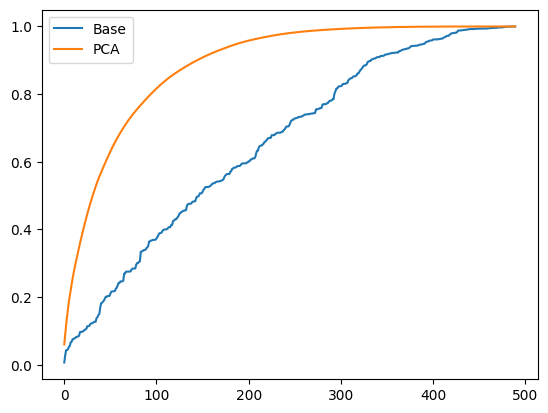

In [91]:
rsqr_base = np.array([fit.rsquared for fit in fits_base])
rsqr_pca = np.array([fit.rsquared for fit in fits_pca])

plt.plot(rsqr_base, label = 'Base')
plt.plot(rsqr_pca, label = 'PCA')
plt.legend()

In [93]:
n_orig = np.arange(2, 492)[rsqr_base > 0.9][0]
n_pca = np.arange(2, 492)[rsqr_pca > 0.9][0]

n_orig, n_pca, n_orig - n_pca,  rsqr_pca[rsqr_pca > 0.9][0]

(335, 146, 189, 0.900064452984222)